In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250


import warnings
warnings.filterwarnings('ignore')

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Administrator\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
movie = pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie.shape

(10, 15)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movie.isnull().count()

V1               10
V2               10
V3               10
V4               10
V5               10
Sixth Sense      10
Gladiator        10
LOTR1            10
Harry Potter1    10
Patriot          10
LOTR2            10
Harry Potter2    10
LOTR             10
Braveheart       10
Green Mile       10
dtype: int64

In [7]:
movies = movie.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [8]:
movies.shape

(10, 10)

# Apriori Algorithum

### I will calculate with different support(10%, 15%, 20%) and confidence (50%, 70%, 90%)

### 1. support 10%, confidence 90%

In [9]:
# Calculating Support

alg1 = apriori(movies, min_support=0.1, use_colnames=True)
alg1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [10]:
# Calculating Lift Ratio

rule1 = association_rules(alg1, metric='lift', min_threshold=0.9)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
235,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


## An leverage value of 0 indicates independence Range will be[-1 1]

### A high conviction value means the consequent is highly depending on the antecedent and range[0 infinity]

In [11]:
# Sorting lift ratio in non-ascending Line

rule1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
161,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
214,"(LOTR2, Green Mile, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
185,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
99,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
173,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
32,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


In [12]:
rule1[rule1.lift>1]

# Lift ration may>1 is  good forinfluential for rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
235,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


<AxesSubplot:xlabel='support', ylabel='confidence'>

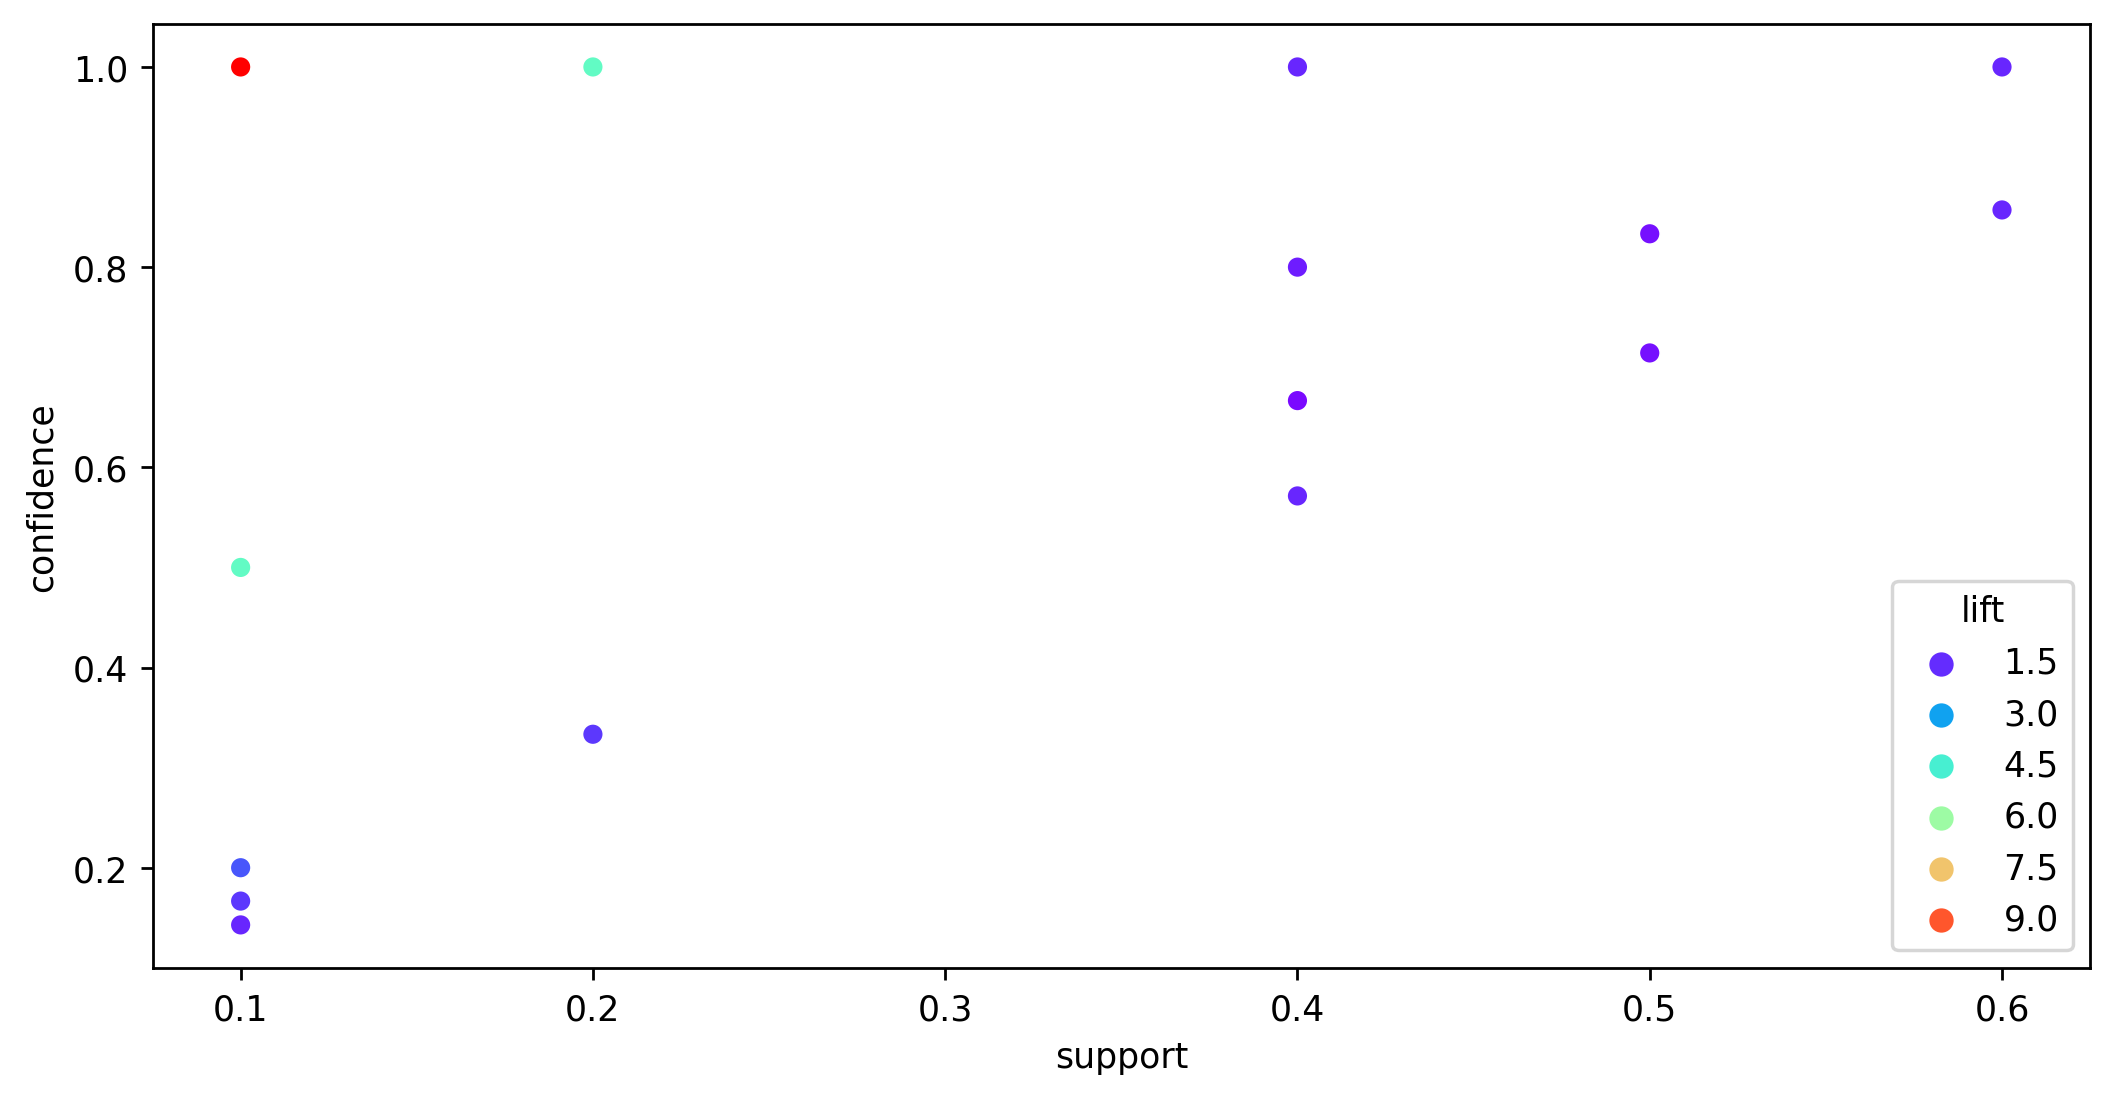

In [13]:
# Visualization of "Support" and "Confidence" with scatter plot

sns.scatterplot(rule1['support'], rule1['confidence'], hue=rule1['lift'], palette='rainbow')

## 2. Support 15%, Confidence 70%

In [14]:
# Calculating Support

alg1 = apriori(movies, min_support=0.15, use_colnames=True)
alg1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [15]:
# Calculating lift ratio

rule2 = association_rules(alg1, metric='lift',min_threshold=0.7)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


## An leverage value of 0 indicates independence.Range will be[-1 1]

### An high conviction value means the consequent is highly depending on the antecedent and range [0 infinity]

In [16]:
# Sorting lift ratio in non-ascending line

rule2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [17]:
rule2[rule2.lift>1]

## lift ration may> 1 is good for influential for a rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


<AxesSubplot:xlabel='support', ylabel='confidence'>

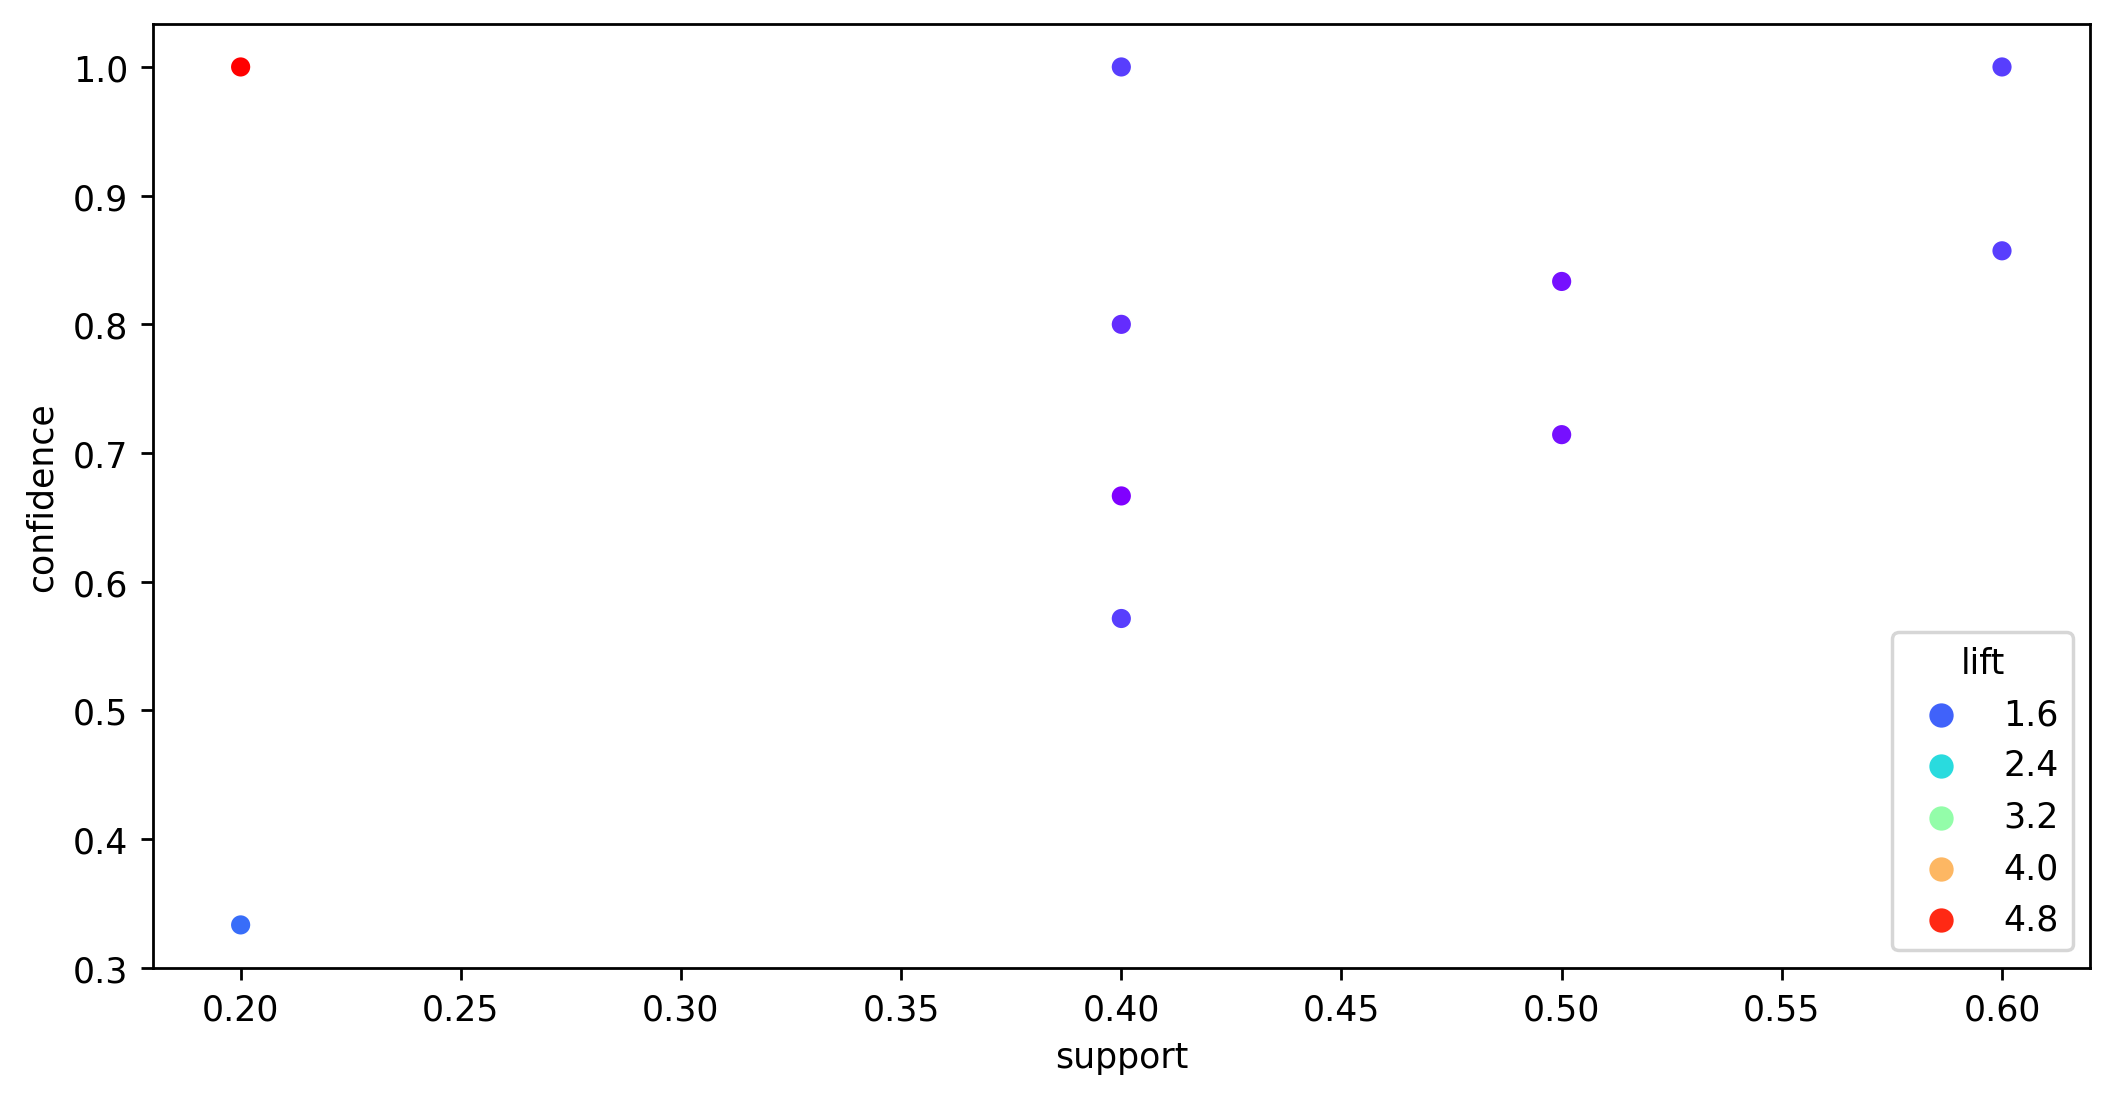

In [29]:
# Visualization of "Suport" and "Confidence" with Sacatter plot

sns.scatterplot(rule2['support'], rule2['confidence'], hue=rule2['lift'], palette='rainbow')

## 3. Support 20%, Confidence 60%

In [23]:
# Calculating Support 
alg3 = apriori(movies,min_support=0.2, use_colnames=True)
alg3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [24]:
# Calculating lift ratio

rule3 = association_rules(alg1,metric='lift',min_threshold=0.6)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


## An leverage value of 0 indicates independence. Range will be[-1 1]

### A high conviction value means the consequent is highly depending on the antecedent and range [0 infinity]

In [25]:
# Sorting lift ratio in non-Ascending lne

rule3.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [26]:
rule3[rule3.lift>1]
## lift ratio may > 1 is good for influential for a rules 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


<AxesSubplot:xlabel='support', ylabel='confidence'>

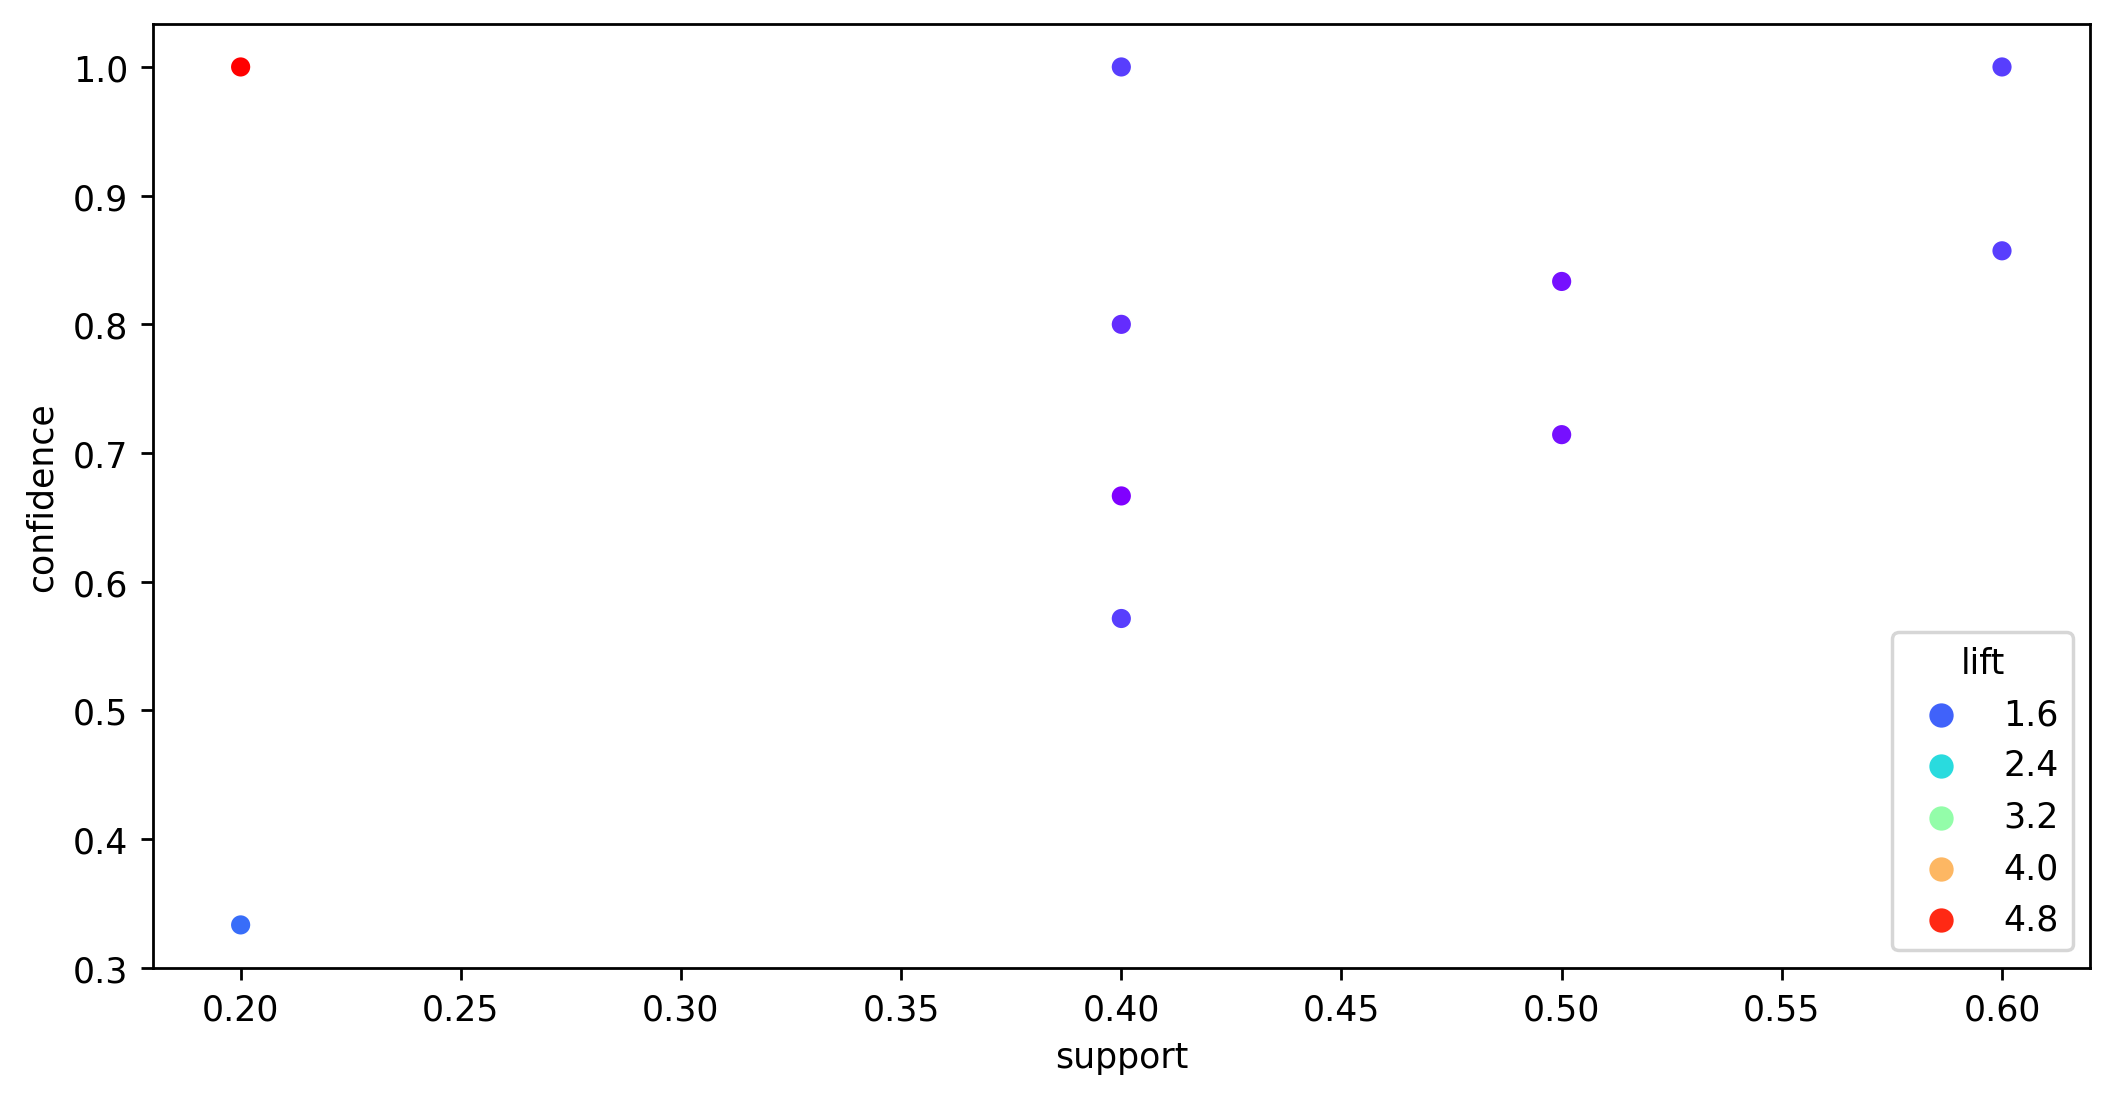

In [28]:
# Visualization of "Suport" and "Confidence" with Sacatter plot

sns.scatterplot(rule3['support'], rule3['confidence'], hue=rule3['lift'], palette='rainbow')